### Part 4

You should now evaluate your models on the FakeNews and the LIAR dataset. Arrange all these results in a table to facilitate a comparison between them. You should be evaluating the model on how well it classifies articles correctly using F-score. You may want to include a confusion matrix to visualize the types of classification errors made by your models.

### Task 1
Evaluate the performance of your Simple and Advanced Models on your FakeNewsCorpus test set. It should be possible to achieve > 80% accuracy but you will not fail the project if your model cannot reach this performance.



In [1]:
# Import the necessary libraries
import pandas as pd

In [2]:
# Define a function to modify the 'type' column values
# This function is used to simplify the classification problem
# The 'reliable' and 'political' types are combined into a single 'reliable' type
def modify_type(y):
    if y == 1.0:
        return 'reliable'
    else:
        return 'fake'

In [3]:
# Define X and y as the 'content' and 'type' columns
X = pd.read_csv('CLEANED_features_output.csv', usecols=['content'])
y = pd.read_csv('labels_output.csv', usecols=['type'])

In [4]:
# Apply the modify_type function to the 'type' column using the map function
y['type'] = y['type'].map(modify_type)

In [5]:
# Split the data into train and test sets
# In an 80/10/10 split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.5, random_state=0)

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Create a TfidfVectorizer object for use in feature extraction
vectorization = TfidfVectorizer()

# Fit the vectorizer to the training data and transform the training data into a vector
# As well as the validation data
xv_train = vectorization.fit_transform(X_train['content'])
xv_test = vectorization.transform(X_test['content'])
y_train = np.ravel(y_train)

In [7]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1500, class_weight = 'balanced', random_state = 0, C=10)

In [8]:
model.fit(xv_train, y_train)

LogisticRegression(C=10, class_weight='balanced', max_iter=1500, random_state=0)

In [9]:
# Print the accuracy of the model on the validation data
model.score(xv_test,y_test)

0.9233644445429756

In [10]:
# Predict the class of the validation data
pred_model = model.predict(xv_test)

In [11]:
from sklearn.metrics import classification_report

# Print the classification report for the model
print(classification_report(y_test,pred_model))

              precision    recall  f1-score   support

        fake       0.97      0.93      0.95    169355
    reliable       0.81      0.90      0.85     56180

    accuracy                           0.92    225535
   macro avg       0.89      0.92      0.90    225535
weighted avg       0.93      0.92      0.92    225535



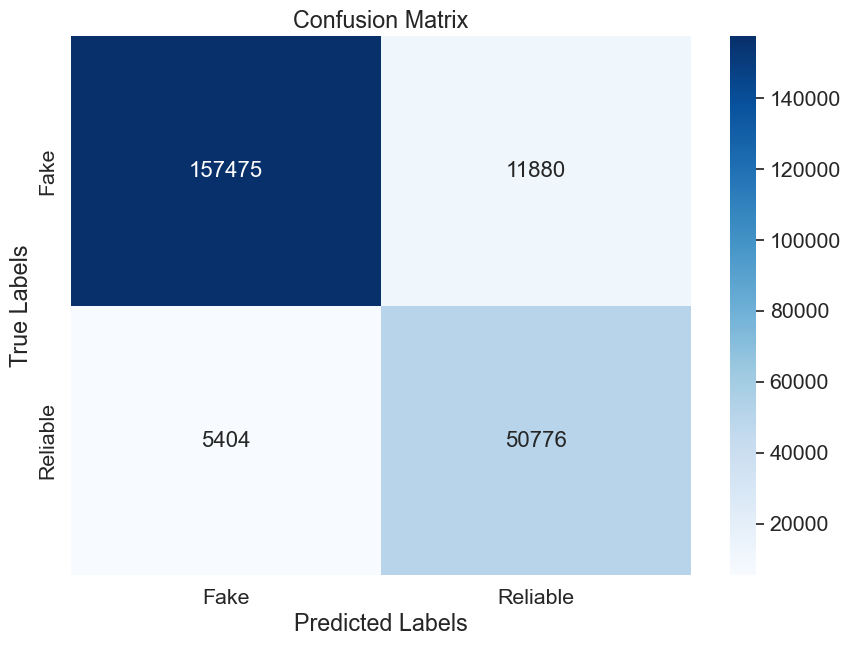

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_mat = confusion_matrix(y_test, pred_model)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(conf_mat, annot=True, annot_kws={"size": 16}, fmt="d", cmap="Blues", xticklabels=['Fake', 'Reliable'], yticklabels=['Fake', 'Reliable'])

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Advanced

In [85]:
import pandas as pd
from scipy import sparse
from scipy.sparse import hstack
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 
from imblearn.over_sampling import RandomOverSampler 

In [86]:
# Reading the data and storing them as dataframes
features = pd.read_csv('CLEANED_features_output.csv') 
labels = pd.read_csv('labels_output.csv') 

In [87]:
# Vectorizes the features and saves them as sparse matrices

title_vectorizer = CountVectorizer(ngram_range=(2, 2), analyzer='word')
sparse_matrix_for_title = title_vectorizer.fit_transform(features['title'])
sparse.save_npz("sparse_matrix_for_title.npz", sparse_matrix_for_title)
sparse_matrix_for_title_load = sparse.load_npz("sparse_matrix_for_title.npz")   

content_vectorizer = CountVectorizer(ngram_range=(2, 2), analyzer='word')
sparse_matrix_for_content = content_vectorizer.fit_transform(features['content'])
sparse.save_npz("sparse_matrix_for_content.npz", sparse_matrix_for_content)
sparse_matrix_for_content_load = sparse.load_npz("sparse_matrix_for_content.npz")

In [88]:
# Combines the sparse matrices into one sparse matrix
matrix = hstack([sparse_matrix_for_content_load,sparse_matrix_for_title_load]) 

In [89]:
# Creates our X and y variables
X = matrix 
y = labels 
y = np.ravel(y)

In [90]:
# Splits the data into training, validation, and test sets using a 80/10/10 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.5, random_state=0)

# Oversamples the training data to balance the classes
oversampler = RandomOverSampler(random_state=0)
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)

# Creates the Naive Bayes model and prints the accuracy score
model = ComplementNB(alpha=0.1) 
model.fit(X_train_oversampled, y_train_oversampled)

print(model.score(X_train_oversampled, y_train_oversampled))

predictions_NB = model.predict(X_test)

print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, y_test)*100)

y_test_pred = model.predict(X_test) 

report = classification_report(y_test, y_test_pred)
print("classification report:")
print(report)

0.9988012254140213
Naive Bayes Accuracy Score ->  74.9036734874853
classification report:
              precision    recall  f1-score   support

           0       0.76      0.71      0.73     26168
           1       0.74      0.90      0.81     56180
           2       0.78      0.88      0.83     14289
           3       0.67      0.46      0.55      3269
           4       0.82      0.66      0.73     33644
           5       0.75      0.70      0.72     22175
           6       0.46      0.74      0.57      3492
           7       0.38      0.56      0.46      2236
           8       0.51      0.61      0.56      6817
           9       0.97      0.79      0.87      8816
          10       0.78      0.68      0.73     48449

    accuracy                           0.75    225535
   macro avg       0.69      0.70      0.69    225535
weighted avg       0.76      0.75      0.75    225535



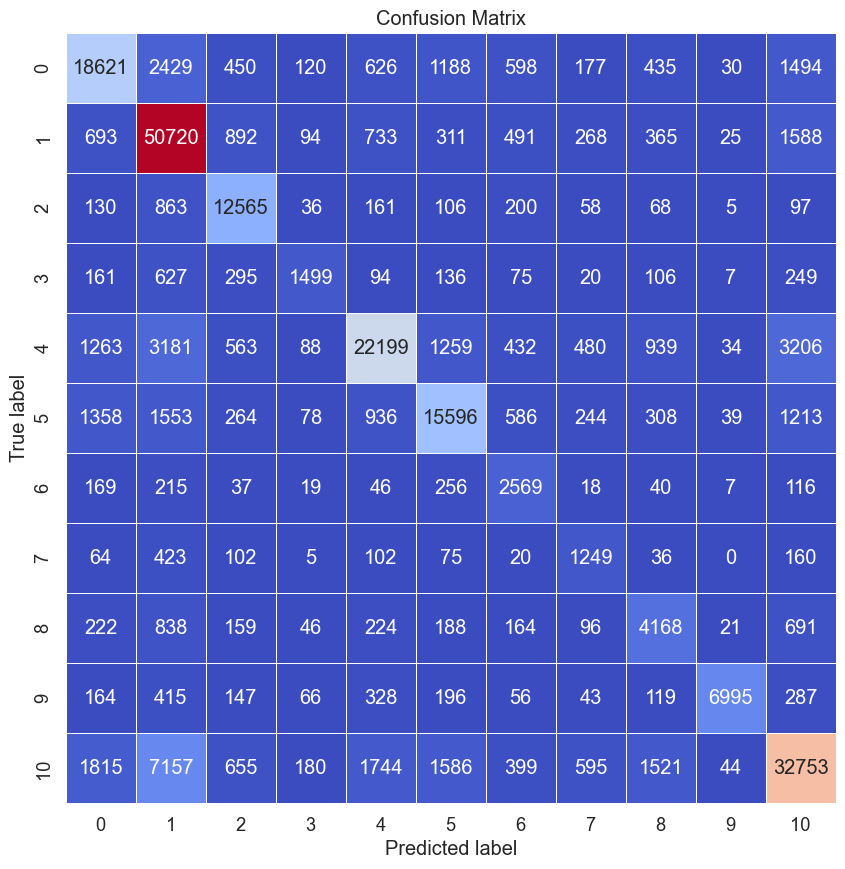

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Create the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Set up the plot
plt.figure(figsize=(10, 10))
sns.set(font_scale=1.2)

# Create the heatmap
sns.heatmap(cm, annot=True, fmt='g', cmap='coolwarm', linewidths=0.5, square=True, cbar=False, xticklabels=True, yticklabels=True)

# Customize the plot
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

### Task 2
In order to allow you to play around cross-domain performance, try the same exercise on the LIAR dataset, where you know the labels, and can thus immediately calculate the performance. You are expected to directly evaluate the model you trained on the FakeNewsCorpus. In other words, you do not need to retrain the model on the LIAR dataset.

In [13]:
# Import the necessary libraries
import pandas as pd

In [14]:
# Define a function to modify the 'type' column values
# This function is used to simplify the classification problem
# The 'reliable' and 'political' types are combined into a single 'reliable' type
def modify_type(y):
    if y == 1.0:
        return 1
    else:
        return 0

In [15]:
# Define X and y as the 'content' and 'type' columns
X = pd.read_csv('CLEANED_features_output.csv', usecols=['content'])
y = pd.read_csv('labels_output.csv', usecols=['type'])

In [16]:
# Apply the modify_type function to the 'type' column using the map function
y['type'] = y['type'].map(modify_type)

In [17]:
# Split the data into train and test sets
# In an 80/10/10 split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.5, random_state=0)

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Create a TfidfVectorizer object for use in feature extraction
vectorization = TfidfVectorizer()

# Fit the vectorizer to the training data and transform the training data into a vector
# As well as the validation data
xv_train = vectorization.fit_transform(X_train['content'])
xv_test = vectorization.transform(X_test['content'])
y_train = np.ravel(y_train)

In [19]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1500, class_weight = 'balanced', random_state = 0, C=10)

In [20]:
model.fit(xv_train, y_train)

LogisticRegression(C=10, class_weight='balanced', max_iter=1500, random_state=0)

In [21]:
# Import the necessary libraries
# pip install dask-ml
import pandas as pd

In [23]:
LIAR_features = pd.read_csv('features_cleaned_LIAR.csv', encoding="utf-8", dtype={'content' : 'object'},)

In [24]:
LIAR_labels = pd.read_csv('labels_LIAR.csv', encoding="utf-8", dtype={'type' : 'object'},)

In [25]:
# Define X and y as the 'content' and 'type' columns
y_test = LIAR_labels['label']
X_test = LIAR_features['content']

In [26]:
# Transform the training data into a vector
xv_test = vectorization.transform(X_test)

In [27]:
# Print the accuracy of the model on the validation data
model.score(xv_test,y_test)

0.7805840568271507

In [28]:
# Predict the class of the validation data
pred_model = model.predict(xv_test)

In [29]:
from sklearn.metrics import classification_report

# Print the classification report for the model
print(classification_report(y_test,pred_model))

              precision    recall  f1-score   support

           0       0.83      0.92      0.88      1059
           1       0.15      0.07      0.10       208

    accuracy                           0.78      1267
   macro avg       0.49      0.50      0.49      1267
weighted avg       0.72      0.78      0.75      1267



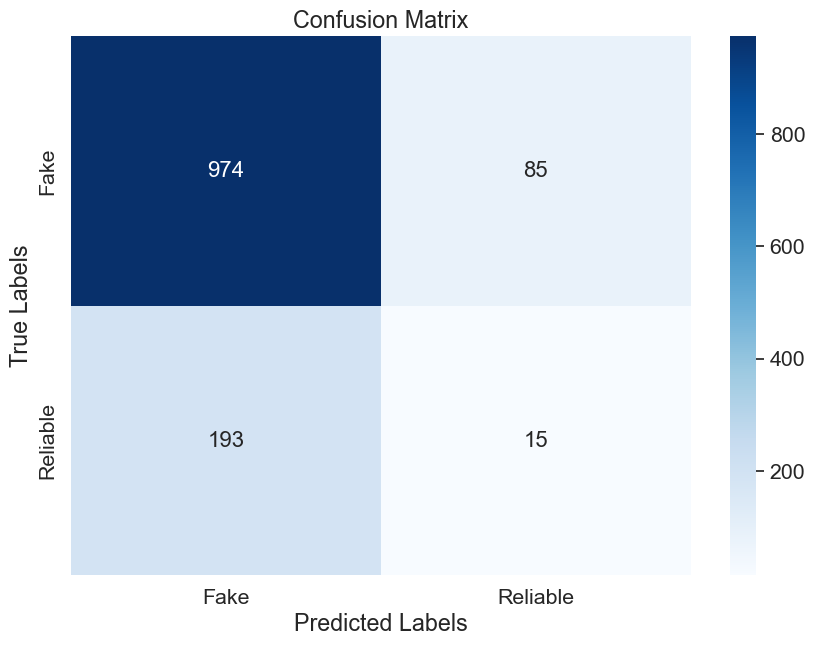

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_mat = confusion_matrix(y_test, pred_model)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(conf_mat, annot=True, annot_kws={"size": 16}, fmt="d", cmap="Blues", xticklabels=['Fake', 'Reliable'], yticklabels=['Fake', 'Reliable'])

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Advanced model LIAR

In [115]:
# Import the necessary libraries
import pandas as pd
import dask.dataframe as dd
import dask_ml.model_selection
import numpy as np

In [116]:
# Define a function to modify the 'type' column values
# This function is used to simplify the classification problem
# The 'reliable' and 'political' types are combined into a single 'reliable' type
def modify_type(y):
    if y == 1.0:
        return 1
    else:
        return 0

In [117]:
# Define X and y as the 'content' and 'type' columns
X = pd.read_csv('CLEANED_features_output.csv', usecols=['content'])
y = pd.read_csv('labels_output.csv', usecols=['type'])

In [118]:
# Apply the modify_type function to the 'type' column using the map function
y['type'] = y['type'].map(modify_type)

In [125]:
# Split the data into train and test sets
# In an 80/10/10 split

X_train, X_test, y_train, y_test = dask_ml.model_selection.train_test_split(X, y, test_size=0.2, random_state=0, shuffle=False)
X_train, X_val, y_train, y_val = dask_ml.model_selection.train_test_split(X_train, y_train, test_size=0.5, random_state=0, shuffle=False)

In [126]:
# Import the necessary libraries
# pip install dask-ml
import dask.dataframe as dd
import dask_ml.model_selection
import numpy as np

In [129]:
LIAR_features = pd.read_csv('features_cleaned_LIAR.csv', encoding="utf-8", dtype={'content' : 'object'},)

In [130]:
LIAR_labels = pd.read_csv('labels_LIAR.csv', encoding="utf-8", dtype={'type' : 'object'},)

In [131]:
# Define X and y as the 'content' and 'type' columns
y_test = LIAR_labels['label']
X_test = LIAR_features['content']
y_test = np.ravel(y_test)

In [132]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (451068, 1)
X_test shape: (1267,)
y_train shape: (451068, 1)
y_test shape: (1267,)


In [133]:
X_train

,content
0,"lost word , hidden word , otter , bank book % ..."
1,poll : call war isra palestinian skyrocket due...
2,american airlin quarterli profit hit higher fu...
3,despit claim iranian revolutionari guard offic...
4,zebrato arshad husain siddiqui headlin : bitco...
...,...
451063,"pa rob lawri bahar father-of-four rob lawri , ..."
451064,getti nigel farag promis `` desert '' ukip uki...
451065,"abort legitim choic , pope state ( ap ) [ pa ]..."
451066,"universal/ap former ss guard oskar groen , < n..."


In [134]:
X_test

0               wisconsin pace doubl number layoff year .
1                    say john mccain done noth help vet .
2       say < num > percent feder spend goe militari <...
3       ronald reagan face even wors recess current one .
4       say charli crist embroil fraud case steer taxp...
                              ...                        
1262    barack obama `` reject everyon white , includ ...
1263    compani hire common core test florida attract ...
1264    say chri christi plan kick-start economi propo...
1265    obama use $ < num > million feder money emmigr...
1266    sen. bob menendez vote enact new tax sale home...
Name: content, Length: 1267, dtype: object

In [135]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer object for use in feature extraction
vectorization = TfidfVectorizer()

# Fit the vectorizer to the training data and transform the training data into a vector
xv_train = vectorization.fit_transform(X_train['content'])

xv_test = vectorization.transform(X_test)

In [136]:
xv_train.shape
y_train.shape

(451068, 1)

In [137]:
model = ComplementNB(alpha=0.1) 
model.fit(xv_train, y_train)

c:\Users\Agnes\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ComplementNB(alpha=0.1)

In [138]:
model.score(xv_test,y_test)

0.4498816101026046

In [139]:
# Predict the class of the validation data
pred_model = model.predict(xv_test)

In [140]:
from sklearn.metrics import classification_report

# Print the classification report for the model
print(classification_report(y_test,pred_model))

              precision    recall  f1-score   support

           0       0.82      0.44      0.57      1059
           1       0.15      0.50      0.23       208

    accuracy                           0.45      1267
   macro avg       0.48      0.47      0.40      1267
weighted avg       0.71      0.45      0.52      1267



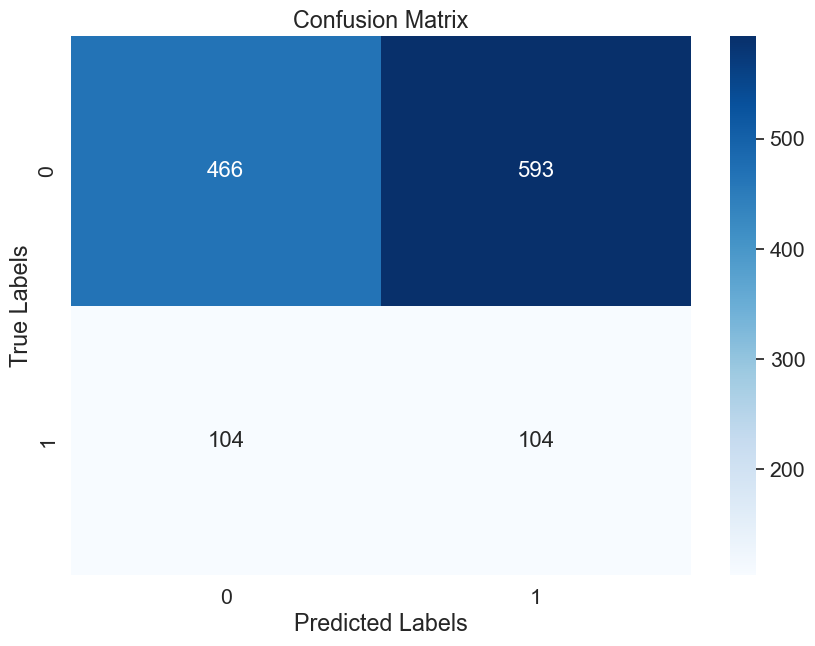

In [141]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_mat = confusion_matrix(y_test, pred_model)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(conf_mat, annot=True, annot_kws={"size": 16}, fmt="d", cmap="Blues", xticklabels=['0', '1'], yticklabels=['0', '1'])

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### Task 3
Compare the results of this experiment to the results you obtained in question 3. Report your LIAR results as part of your report. Remember to test the performance of your Simple Model as well.